### Making Blogs by topic by llm chain

Start---->Topic --->LLM+prompt--->Outline--->LLM+prompt---> Blog--->END
                   

In [9]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_groq import ChatGroq
from dotenv import load_dotenv


In [10]:
load_dotenv()

model = ChatGroq(model="llama-3.1-8b-instant", temperature=0)

In [11]:
# Create state
class BlogState(TypedDict):
    topic: str
    outline: str
    blog: str

In [12]:
# Creating function for each step
def create_outline(state: BlogState)-> BlogState:
    # Fetch title from state
    topic = state["topic"]
    # Create prompt
    prompt = f"You are a blog writer. Create a detailed outline for a blog post about {topic}."
    # Call LLm model
    outline = model.invoke(prompt)
    # Store outline in state
    state["outline"] = outline
    
    return state


def write_blog(state: BlogState) -> BlogState:
    # Fetch outline from state
    outline = state["outline"]
    # Create prompt
    prompt = f"You are a blog writer. Write a detailed blog post based on the following outline:\n{outline}"
    # Call LLLm model for blog writing
    blog = model.invoke(prompt)
    # Update the state
    state["blog"] = blog
    
    return state

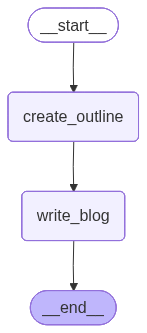

In [14]:
# Create the graph
graph = StateGraph(BlogState)

# ADD nodes
graph.add_node("create_outline", create_outline)
graph.add_node("write_blog", write_blog)

# Add edges
graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "write_blog")
graph.add_edge("write_blog", END)

# Compile the graph
workflow = graph.compile()
workflow



In [16]:
# Execute the workflow
initial_state = {"topic": "The future of Agentic AI"}
final_state = workflow.invoke(initial_state)
print(final_state["blog"].content)

**The Future of Agentic AI: Exploring the Possibilities and Challenges of Autonomous Artificial Intelligence**

As we continue to push the boundaries of artificial intelligence (AI), one area that has garnered significant attention in recent years is Agentic AI. This type of AI is designed to be autonomous, self-aware, and capable of making decisions without human intervention. In this blog post, we will explore the current state of Agentic AI, its future developments, and the challenges it poses, including accountability, ethics, and job displacement.

**I. Introduction**

Agentic AI is a type of AI that is designed to be proactive, goal-oriented, and able to interact with its environment in a meaningful way. It is based on the concept of agency, which refers to the ability of an entity to act independently and make decisions that are not predetermined by its programming. Agentic AI has the potential to revolutionize various industries and aspects of our lives, but it also raises conc

In [19]:
print(final_state["outline"].content)

**Title:** "The Future of Agentic AI: Exploring the Possibilities and Challenges of Autonomous Artificial Intelligence"

**I. Introduction**

* Brief overview of Agentic AI and its significance
* Importance of understanding the future of Agentic AI
* Thesis statement: As Agentic AI continues to evolve, it will revolutionize various industries and aspects of our lives, but it also raises concerns about accountability, ethics, and job displacement.

**II. Current State of Agentic AI**

* Definition and explanation of Agentic AI
* Examples of current Agentic AI applications (e.g., chatbots, virtual assistants, autonomous vehicles)
* Discussion of the benefits and limitations of current Agentic AI systems

**III. Future Developments in Agentic AI**

* Advancements in machine learning and deep learning
* Integration of cognitive architectures and symbolic reasoning
* Potential applications of Agentic AI in various industries (e.g., healthcare, finance, education)
* Discussion of the potenti